In [1]:
#Librerias necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb


In [2]:
#Cargamos el dataset limpio 
data = pd.read_csv('dataclean.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.sample(3)

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,neighbourhood_cleansed_Villa Soldati,neighbourhood_cleansed_Villa Urquiza,property_type_Apartment,property_type_House,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathroomtype_private,bathroomtype_shared
7939,0,1,1,4,1,1,2,4343,4,180,...,0,0,1,0,1,0,0,0,1,0
846,0,1,1,1,2,1,1,3329,3,1125,...,0,0,1,0,0,0,1,0,1,0
17045,1,1,0,2,1,1,1,3185,1,1125,...,0,0,0,1,0,0,1,0,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17078 entries, 0 to 17077
Data columns (total 89 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   host_is_superhost                         17078 non-null  int64
 1   host_has_profile_pic                      17078 non-null  int64
 2   host_identity_verified                    17078 non-null  int64
 3   accommodates                              17078 non-null  int64
 4   bathrooms                                 17078 non-null  int64
 5   bedrooms                                  17078 non-null  int64
 6   beds                                      17078 non-null  int64
 7   price                                     17078 non-null  int64
 8   minimum_nights                            17078 non-null  int64
 9   maximum_nights                            17078 non-null  int64
 10  instant_bookable                          17078 non-null  

In [4]:
#Genero mi variable X
X=data.drop(['price'],axis=1)

#Genero la variable y
y = data['price'].squeeze()

#Creamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10,shuffle=True)

### Linear Regression

In [5]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

#Predict
lr_prediction = regressor.predict(X_test)
lr_prediction_train = regressor.predict(X_train)

score = r2_score(y_test, lr_prediction)

print('LR MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, lr_prediction_train), mean_squared_error(y_test, lr_prediction)))
print('LR R^2 train: %.3f, test: %.3f' % (r2_score(y_train, lr_prediction_train),r2_score(y_test, lr_prediction)))
print('-----------------------------------------------------')


LR MSE train: 18411793.322, test: 19232736.659
LR R^2 train: 0.385, test: 0.404
-----------------------------------------------------


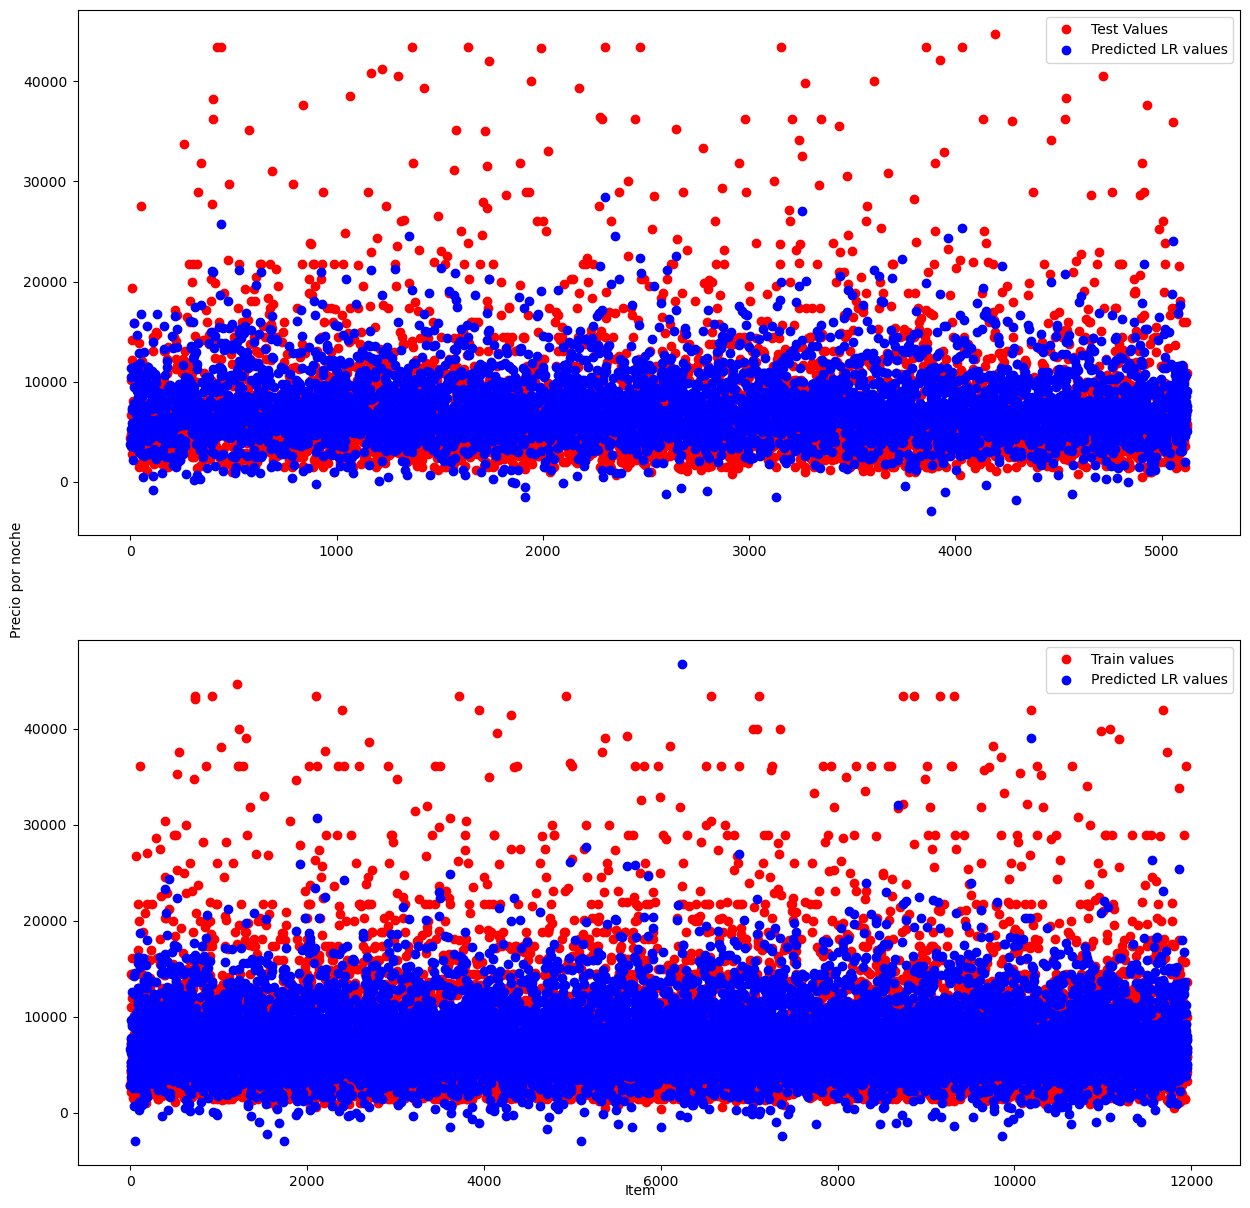

In [6]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lr_prediction, 'bo', label="Predicted LR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lr_prediction_train, 'bo', label="Predicted LR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

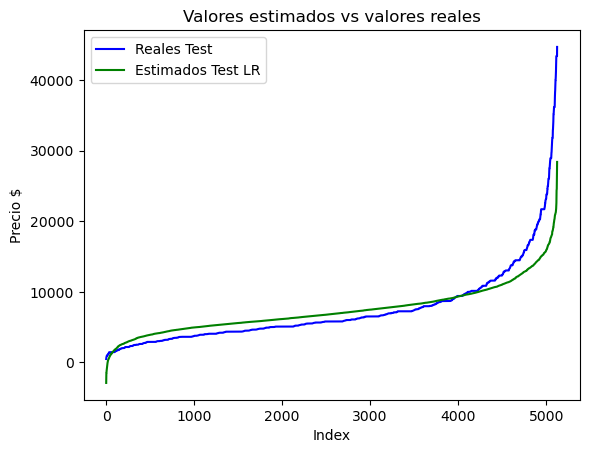

In [7]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('Precio $')
plt.show()

In [8]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [9]:

regressor_rfr = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
regressor_rfr.fit(X_train, y_train.squeeze())

#Model accuracties and validation analysis
#Seattle
y_train_rfr_preds = regressor_rfr.predict(X_train)
y_test_rfr_preds = regressor_rfr.predict(X_test)
print('Random Forest MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_rfr_preds), mean_squared_error(y_test, y_test_rfr_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_rfr_preds),r2_score(y_test, y_test_rfr_preds)))
print('-----------------------------------------------------')



Random Forest MSE train: 2428257.873, test: 17694138.479
Random Forest R^2 train: 0.919, test: 0.452
-----------------------------------------------------


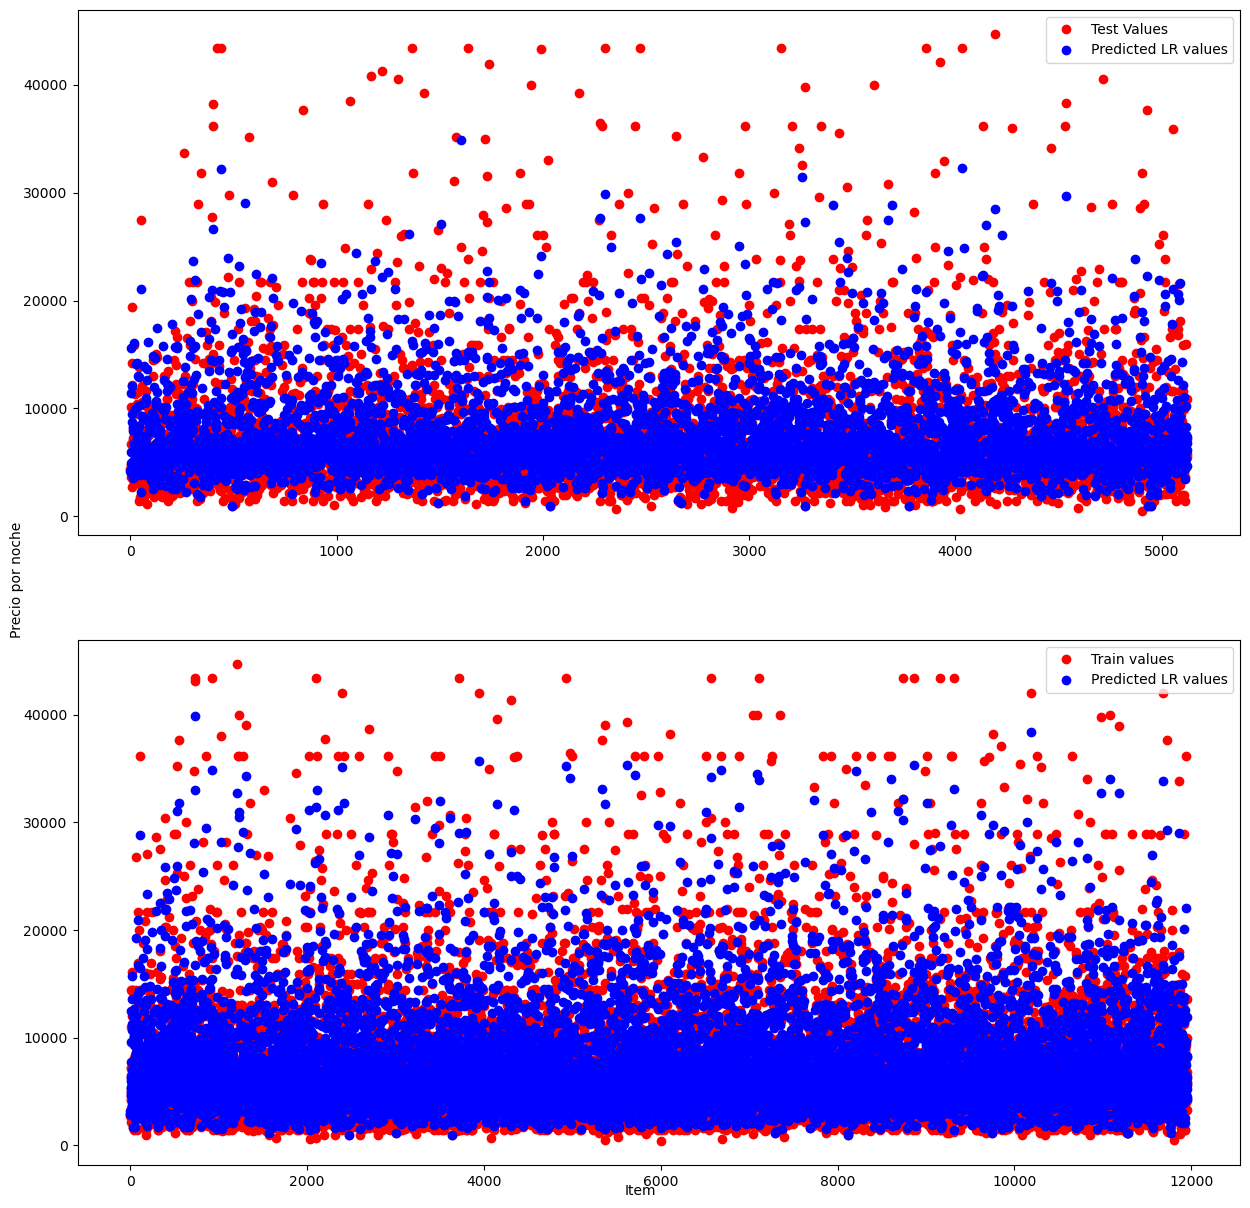

In [10]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],y_test_rfr_preds, 'bo', label="Predicted LR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],y_train_rfr_preds, 'bo', label="Predicted LR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

Text(0.5, 1.0, 'CABA feature importances')

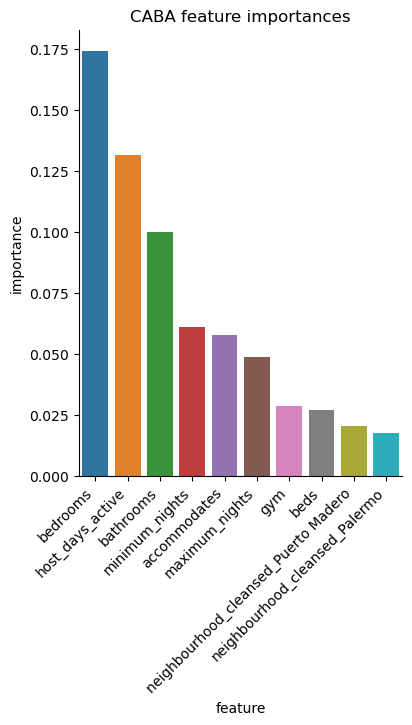

In [11]:
#Feature importancies ranking plot foSeattle's reviews¶
importances = regressor_rfr.feature_importances_
feat_names = X.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result_sort = tree_result.sort_values(by='importance',ascending=False)[:10]
chart = sns.catplot(x='feature', y='importance', kind='bar', data=tree_result_sort)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
plt.title(label= "CABA feature importances", fontdict=None, loc='center', pad=None)

In [12]:
params_xgb = {  
    "n_estimators": [500,1000,2000], 
    "max_depth": [4,5,6], 
    "learning_rate": [0.005,0.01],  
}

xgb_model = xgb.XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, param_grid=params_xgb, cv=cv, verbose=1, n_jobs=-1)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/docker/.conda/envs/dhdsblend2021/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 22.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
          

In [13]:
xgb_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 2000}

In [14]:
y_train_xgb_preds = xgb_grid.predict(X_train)
y_test_xgb_preds = xgb_grid.predict(X_test)
print('XGB MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_xgb_preds), mean_squared_error(y_test, y_test_xgb_preds)))
print('XGB Forest R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_xgb_preds),r2_score(y_test, y_test_xgb_preds)))
print('-----------------------------------------------------')


XGB MSE train: 9918140.972, test: 16781147.406
XGB Forest R^2 train: 0.669, test: 0.480
-----------------------------------------------------


/home/docker/.conda/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


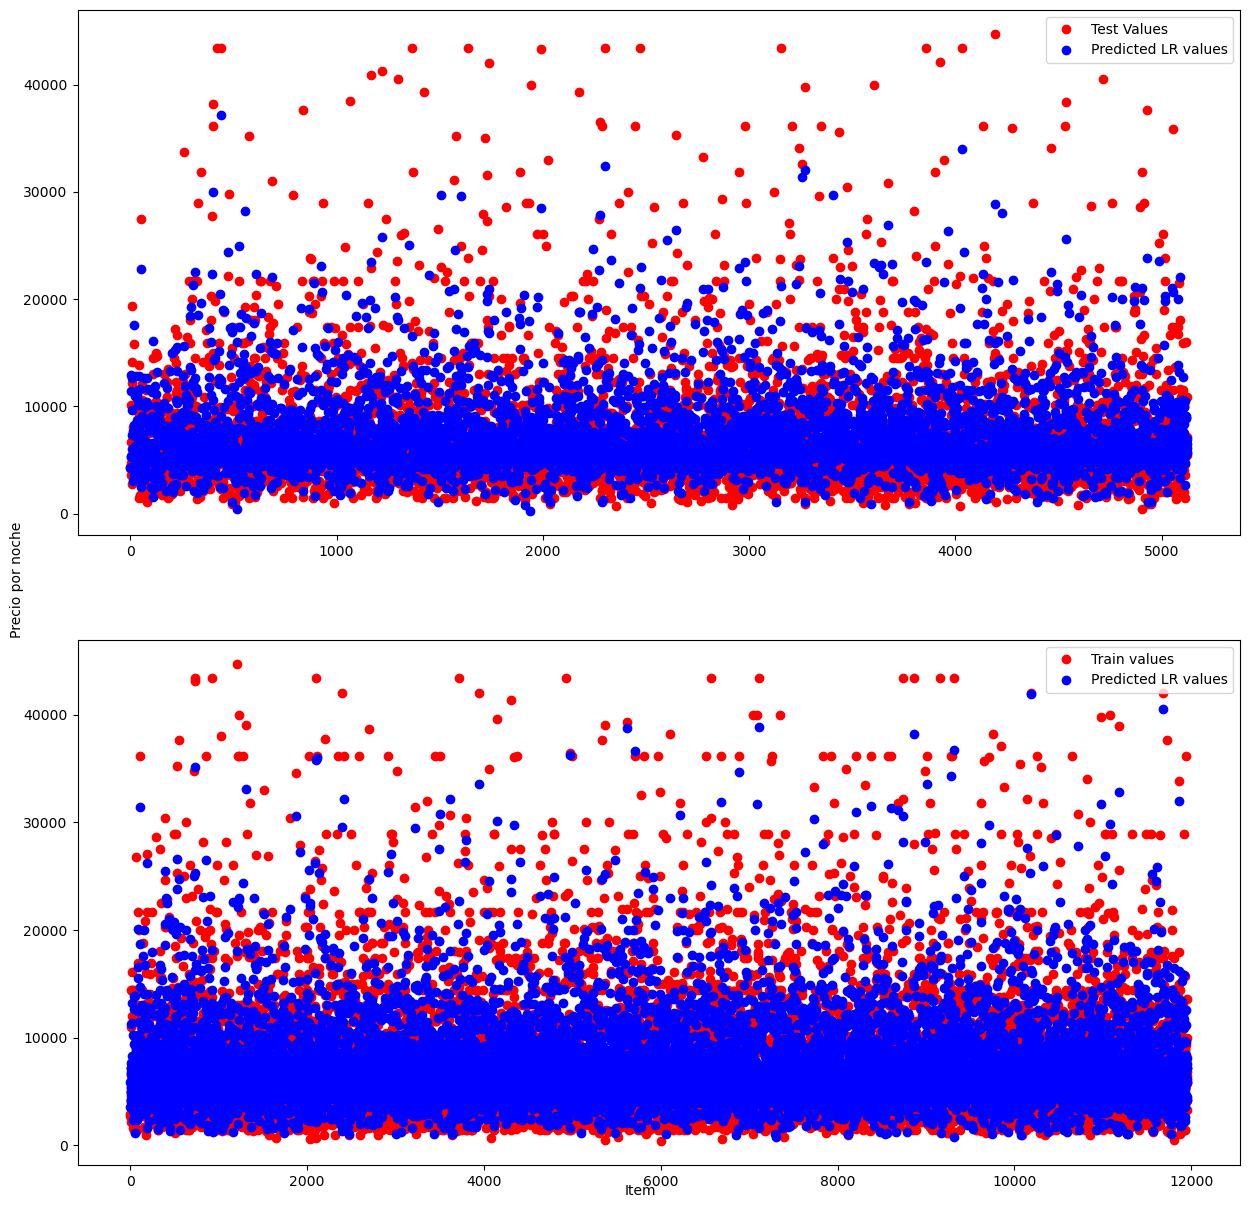

In [15]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],y_test_xgb_preds, 'bo', label="Predicted LR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],y_train_xgb_preds, 'bo', label="Predicted LR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

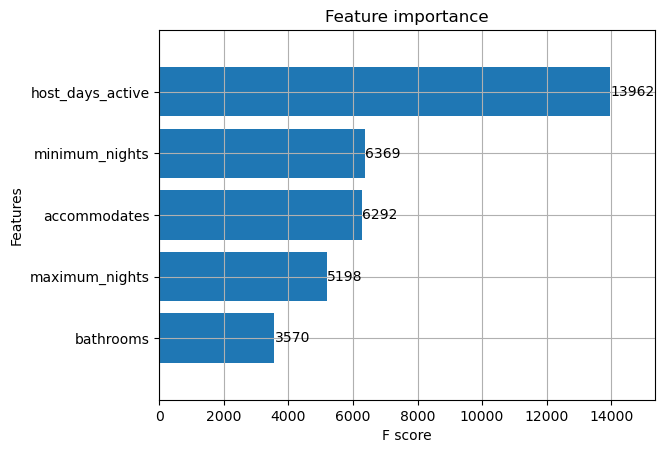

In [16]:
from xgboost import plot_importance
plot_importance(xgb_grid.best_estimator_, height = 0.8,max_num_features=5);

In [17]:

params_lgb = {  
    "n_estimators": [1000,2000,4000], 
    "max_depth": [6,7,8,9,10], 
    "learning_rate": [0.005, 0.01],  
}

lgb_model = lgb.LGBMRegressor()
lgb_grid = GridSearchCV(lgb_model, param_grid=params_lgb, cv=cv, verbose=1, n_jobs=-1)
lgb_grid.fit(X_train,y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


/home/docker/.conda/envs/dhdsblend2021/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 30.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [100, 500, 1000, 2000]},
             verbose=1)

In [18]:
lgb_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 2000}

In [19]:
y_train_lgb_preds = lgb_grid.predict(X_train)
y_test_lgb_preds = lgb_grid.predict(X_test)
print('LGB MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_lgb_preds), mean_squared_error(y_test, y_test_lgb_preds)))
print('LGB Forest R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_lgb_preds),r2_score(y_test, y_test_lgb_preds)))
print('-----------------------------------------------------')


LGB MSE train: 10540552.244, test: 16748857.268
LGB Forest R^2 train: 0.648, test: 0.481
-----------------------------------------------------


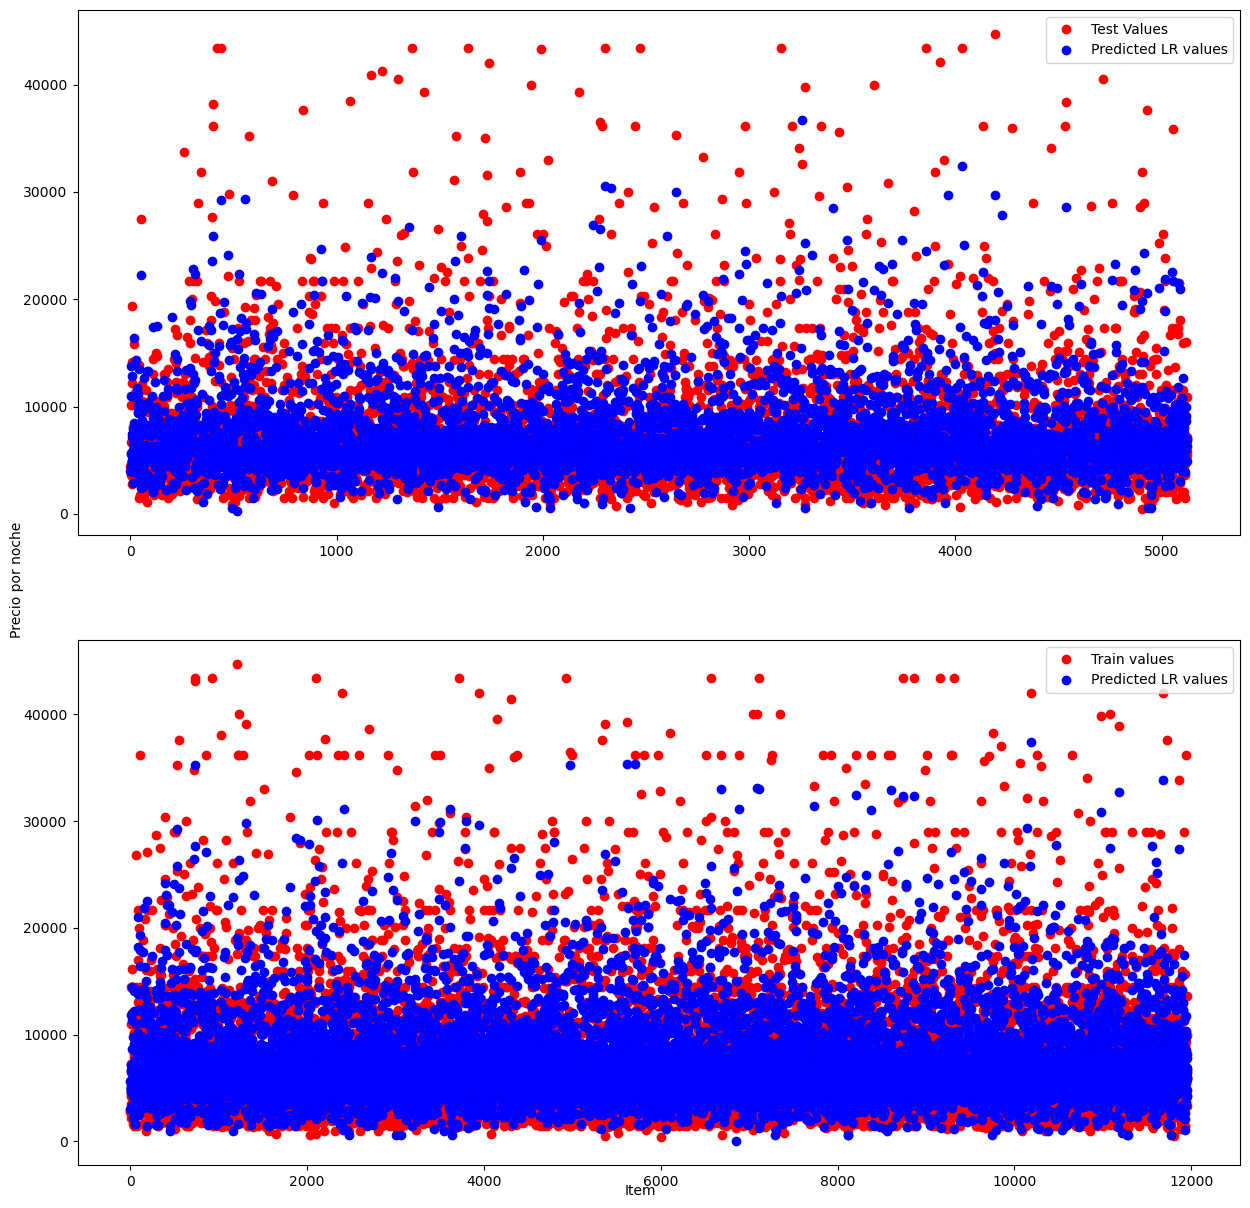

In [20]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],y_test_lgb_preds, 'bo', label="Predicted LR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],y_train_lgb_preds, 'bo', label="Predicted LR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Precio por noche', va='center', rotation='vertical')
plt.show()

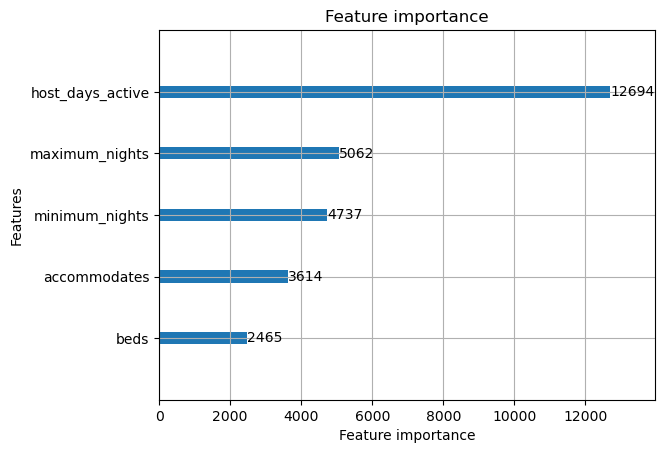

In [21]:
lgb.plot_importance(lgb_grid.best_estimator_, max_num_features=5);

In [31]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout,DenseFeatures

In [46]:


tf.keras.backend.set_floatx('float32')

model = tf.keras.Sequential()
model.add(Dropout(0.2, input_shape=(91,)))
model.add(Dense(91, input_dim=91, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

opt=tf.keras.optimizers.Adam(learning_rate=0.01)
rmse=tf.keras.metrics.RootMeanSquaredError()
model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mae',rmse])


In [47]:
model_ts.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                5696      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,921
Trainable params: 9,921
Non-trainable params: 0
_________________________________________________________________


In [48]:
lr_reducer=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=2,factor=0.2)
early_stopper=tf.keras.callbacks.EarlyStopping(patience=5)
callbacks=[lr_reducer,early_stopper]

history=model.fit(X_train_scl,y_train,validation_data=(X_test_scl,y_test), callbacks=callbacks,epochs=50,batch_size=64,verbose=2)

Epoch 1/50
187/187 - 0s - loss: 37964180.0000 - mae: 4136.6567 - root_mean_squared_error: 6161.5078 - val_loss: 20412994.0000 - val_mae: 2793.4946 - val_root_mean_squared_error: 4518.0742
Epoch 2/50
187/187 - 0s - loss: 18977560.0000 - mae: 2731.1804 - root_mean_squared_error: 4356.3242 - val_loss: 19227726.0000 - val_mae: 2713.1140 - val_root_mean_squared_error: 4384.9429
Epoch 3/50
187/187 - 0s - loss: 18308380.0000 - mae: 2671.4749 - root_mean_squared_error: 4278.8291 - val_loss: 18775820.0000 - val_mae: 2788.2517 - val_root_mean_squared_error: 4333.1074
Epoch 4/50
187/187 - 0s - loss: 17887272.0000 - mae: 2645.1584 - root_mean_squared_error: 4229.3345 - val_loss: 18458712.0000 - val_mae: 2702.1221 - val_root_mean_squared_error: 4296.3604
Epoch 5/50
187/187 - 0s - loss: 17551856.0000 - mae: 2623.2256 - root_mean_squared_error: 4189.4937 - val_loss: 18789440.0000 - val_mae: 2622.1765 - val_root_mean_squared_error: 4334.6787
Epoch 6/50
187/187 - 0s - loss: 17362726.0000 - mae: 2624.57

In [49]:
history_df=pd.DataFrame(history.history)
history_df.head()

,loss,mae,root_mean_squared_error,val_loss,val_mae,val_root_mean_squared_error,lr
0,37964180.0,4136.656738,6161.507812,20412994.0,2793.494629,4518.074219,0.01
1,18977560.0,2731.180420,4356.324219,19227726.0,2713.114014,4384.942871,0.01
2,18308380.0,2671.474854,4278.829102,18775820.0,2788.251709,4333.107422,0.01
3,17887272.0,2645.158447,4229.334473,18458712.0,2702.122070,4296.360352,0.01
4,17551856.0,2623.225586,4189.493652,18789440.0,2622.176514,4334.678711,0.01


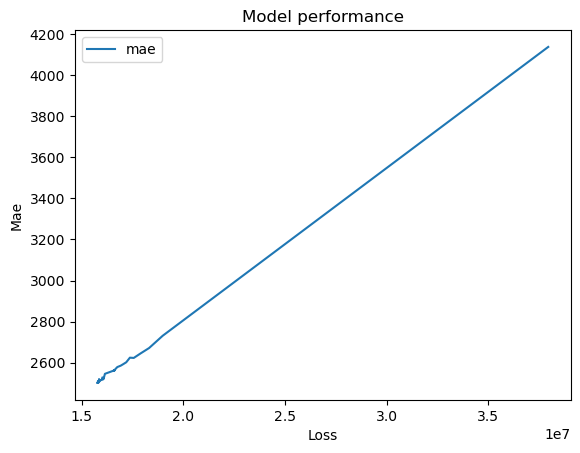

In [50]:
history_df.plot(x='loss',y='mae')
plt.xlabel('Loss')
plt.ylabel('Mae')
plt.title("Model performance")
plt.show()